# sspike usage

## Imports

- `pnut`: process neutrino underground telemetry.
- `beer`: back-end event reader.
- `Supernova`: simulation and progenitor specifics.
- `Detector`: detector specifics.

In [24]:
from sspike import pnut, beer
from sspike.supernova import Supernova
from sspike.detectors import Detector

## Supernova parameters

- `model`: current options are `Nakazato_2013`, `Tamborra_2014`.  Others available soon?
- `progenitor`: see notebooks/documentation for each model.
- `transformation`: `NoTransformation` has been tested.  Others available soon?
- `distance`: distance to supernova in kpc.

In [25]:
model = 'Nakazato_2013'
progenitor = {'mass': 20,
              'metal': 0.02,
              't_rev': 300}
transformation = 'NoTransformation'
distance = 10.0

## Initialize classes

- `Detector` must be in `SNOwGLoBES` and `snewpy`.

In [26]:
detector = Detector('kamland')
sn = Supernova(model, progenitor, transformation, distance)

## Luminosity

Get luminosity as a pandas DataFrame with `pnut` or plot with `beer`.

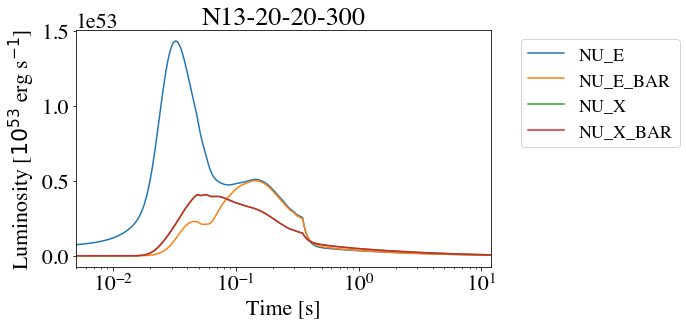

In [27]:
# lum = pnut.get_luminosities(sn)
beer.plot_luminosities(sn)

## Fluences

Get model fluxes scaled by distance and integrated over time.

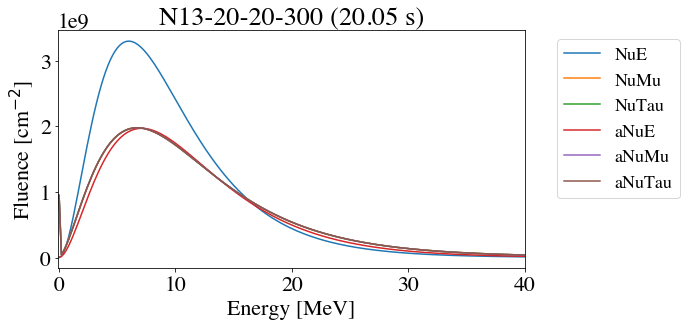

In [28]:
# fluences = pnut.get_fluences(sn)
beer.plot_fluences(sn)

## SNOwGLoBES processing

Use `snewpy` to run simulation fluences in `SNOwGLoBES`.

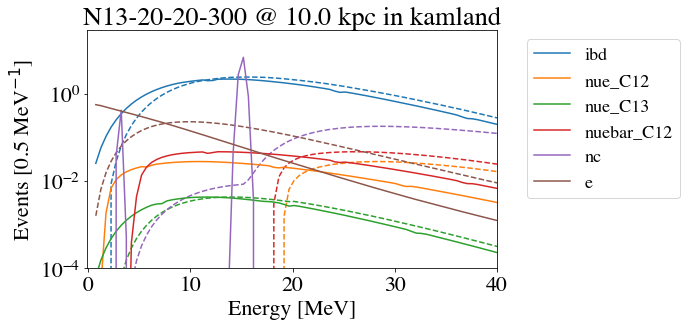

In [29]:
# snow_events = pnut.snowglobes_events(sn, detector)
beer.plot_snowglobes_events(sn, detector)

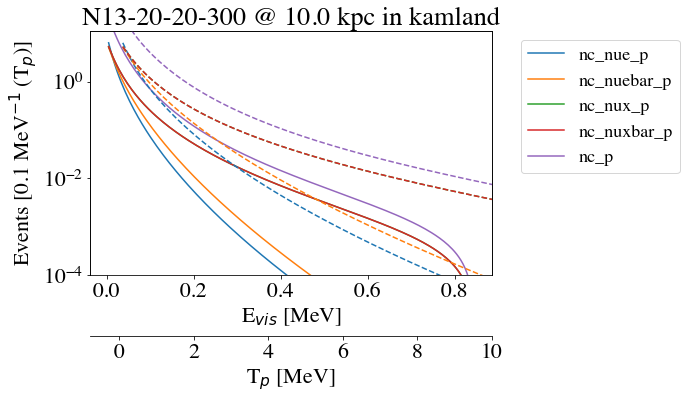

In [30]:
sspike_events = pnut.sspike_events(sn, detector)
beer.plot_sspike_events(sn, detector)

In [31]:
totals = pnut.event_totals(sn, detector)
beer.bar_totals(sn, detector)

In [51]:
vis = pnut.vis_totals(sn, detector)
beer.bar_vis(sn, detector)

In [52]:
vis

,model,mass,metal,t_rev,channel,events
0,Nakazato_2013,20,0.02,300,ibd,90.400511
1,Nakazato_2013,20,0.02,300,nue_C12,1.279816
2,Nakazato_2013,20,0.02,300,nue_C13,0.163539
3,Nakazato_2013,20,0.02,300,nuebar_C12,2.118525
4,Nakazato_2013,20,0.02,300,nc,10.867213
5,Nakazato_2013,20,0.02,300,e,7.759577
6,Nakazato_2013,20,0.02,300,nc_p,2.276566


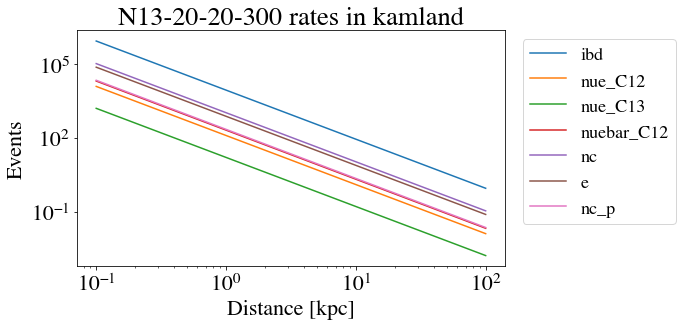

In [35]:
beer.plot_distance_rates(sn, detector)

In [36]:
t_bins = 20
t_start = 0.0105
t_end = 0.55
sn2 = Supernova(model, progenitor, transformation, distance, t_bins, t_start, t_end)

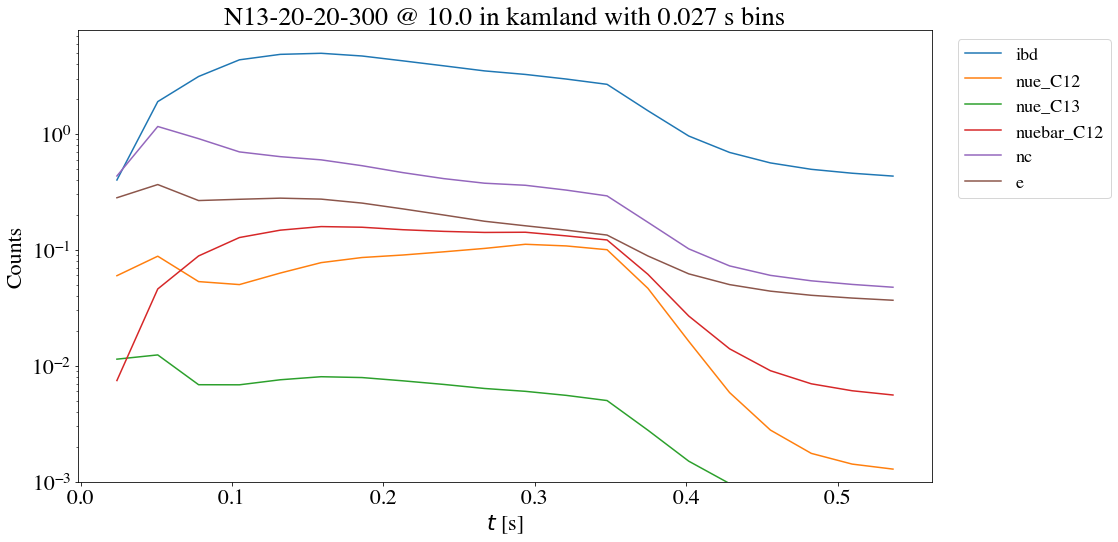

In [37]:
counts = pnut.time_events(sn2, detector)
beer.plot_series(sn2, detector)

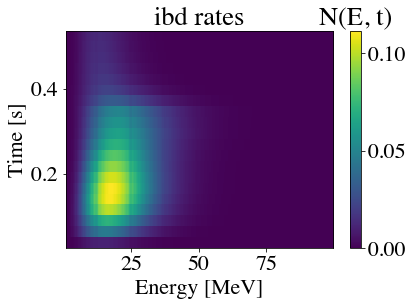

In [38]:
beer.plot_N_chan(sn2, detector, 'ibd')

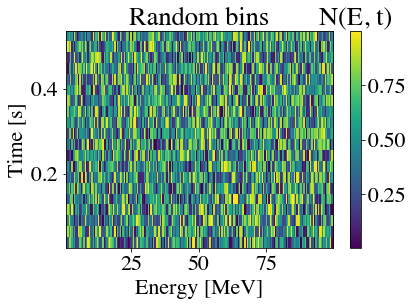

In [39]:
beer.plot_N_chan(sn2, detector, "random", save=False)

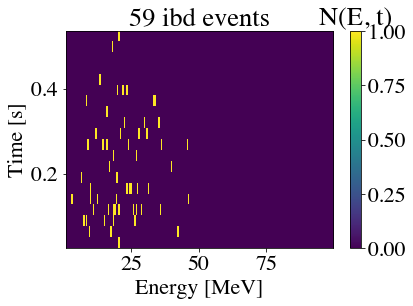

In [44]:
beer.plot_N_chan(sn2, detector, 'ibd', events=True, save=False)

In [45]:
sn3 = Supernova(model, progenitor, transformation, distance, 1, t_start, t_end)
snow = pnut.snowglobes_events(sn3, detector)
nc = pnut.sspike_events(sn3, detector)
tots = pnut.event_totals(sn3, detector)
vis = pnut.vis_totals(sn3, detector)
vis

,model,mass,metal,t_rev,channel,events
0,Nakazato_2013,20,0.02,300,ibd,50.035980
1,Nakazato_2013,20,0.02,300,nue_C12,1.161405
2,Nakazato_2013,20,0.02,300,nue_C13,0.105780
3,Nakazato_2013,20,0.02,300,nuebar_C12,1.691200
4,Nakazato_2013,20,0.02,300,nc,7.753683
5,Nakazato_2013,20,0.02,300,e,3.394543
6,Nakazato_2013,20,0.02,300,nc_p,2.193914
